Here is the first Part =

Part 0 Initial
---------------------


Readi file into pandas datafrme

In [14]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
import os
dicPath = os.getcwd()
dicPath = os.path.join(dicPath,'Crime Prediction Data','communities-crime-clean.csv')

In [16]:
df=pd.read_csv(dicPath)
df['highCrime'] = np.where(df['ViolentCrimesPerPop']>0.1, 1, 0)

Over view for the data

In [18]:
df.shape

(1994, 105)

In [3]:
pos=df[(df['highCrime'] == 1)]
pos_percentage=len(pos)/len(df)
print (len(pos))
neg_percentage=1-pos_percentage
pos_percentage
neg_percentage

1250


0.37280481685900657

In [4]:
pos_percentage


0.6271951831409934

In [5]:
from sklearn import tree
initial=pd.read_csv('communities-crime-clean.csv')
initial = initial.drop('communityname', 1)
initial = initial.drop('ViolentCrimesPerPop', 1)
initial = initial.drop('fold', 1)

initial = initial.drop('state', 1)
Y = df['highCrime']
clf = tree.DecisionTreeClassifier(max_depth=3)
#clf = tree.DecisionTreeClassifier()
clf = clf.fit(initial, Y)
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

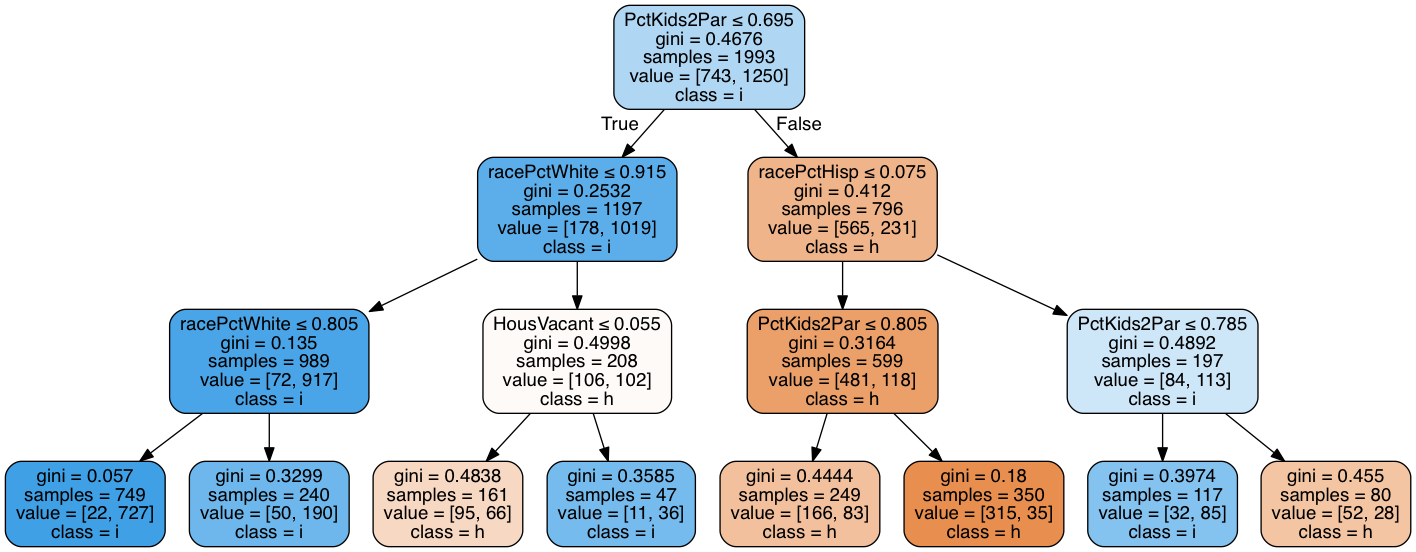

In [6]:
import pydotplus 
from IPython.display import Image  
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=list(initial),  
                         class_names='highCrime',  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

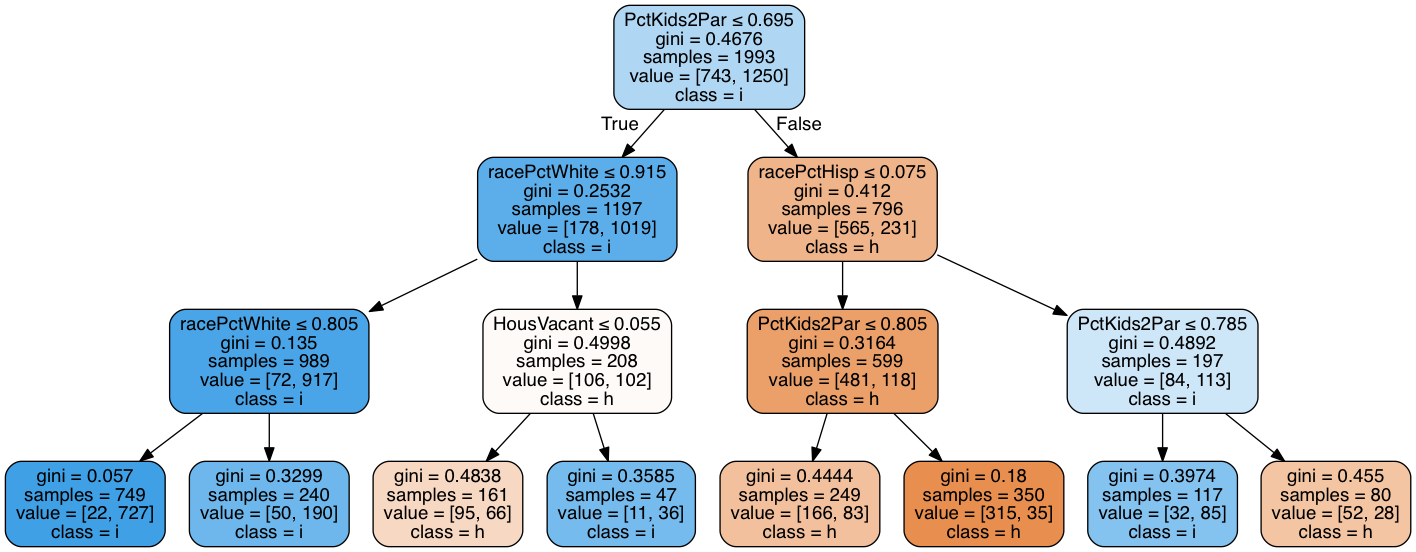

In [7]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=list(initial),  
                         class_names='highCrime',  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 


In [37]:
list(initial)
feature_name=list(initial)

In [10]:
len(pos)

1250

In [11]:
neg=df[(df['highCrime'] == 0)]
len(neg)

743

In [40]:
y_pred = clf.predict(initial)
feature_importance=clf.feature_importances_
print("feature importance is ",feature_importance)
print ("length feature array",len(feature_importance))
for i in range (0,len(feature_importance)):
    if(feature_importance[i]!=0):
        print("index is ",feature_name[i])


feature importance is  [ 0.          0.          0.          0.1604828   0.          0.10290353
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.73661367  0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.     

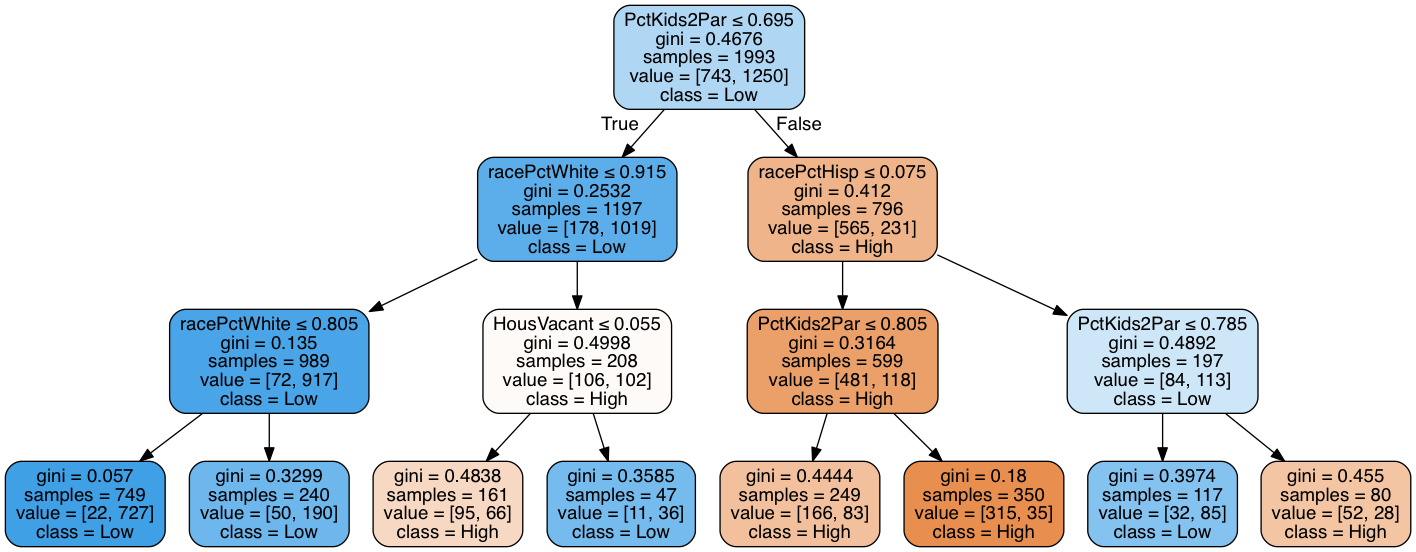

In [13]:
classname=['High','Low']
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=list(initial),  
                         class_names=classname,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

Accuracy='Accuracy'
print Accuracy

In [14]:
from sklearn.metrics import accuracy_score
print ('Accuracy is', accuracy_score(Y,y_pred)*100)

Accuracy is 83.592574009


from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, initial, Y,10)
scores 

In [15]:
df=pd.read_csv('communities-crime-clean.csv')

In [16]:
from sklearn.model_selection import cross_val_score
fold=df['fold']
scores = cross_val_score(clf, initial, Y,fold,'accuracy',10)
scores 

array([ 0.79      ,  0.875     ,  0.83      ,  0.84924623,  0.65326633,
        0.75879397,  0.84924623,  0.7839196 ,  0.79396985,  0.79899497])

In [17]:
scores = cross_val_score(clf, initial, Y,fold,'recall',10)
scores 

array([ 0.92 ,  0.968,  0.896,  0.88 ,  0.664,  0.712,  0.92 ,  0.696,
        0.912,  0.824])

In [18]:
scores = cross_val_score(clf, initial, Y,fold,'precision',10)
scores 

array([ 0.78231293,  0.85211268,  0.84210526,  0.88      ,  0.75454545,
        0.88118812,  0.85185185,  0.94565217,  0.79166667,  0.85123967])

In [19]:
scores = cross_val_score(clf, initial, Y,cv=5)
scores

array([ 0.87218045,  0.78947368,  0.70927318,  0.79899497,  0.83165829])

In [20]:
scores = cross_val_score(clf, initial, Y,None,'accuracy',cv=10)
scores

array([ 0.79      ,  0.875     ,  0.83      ,  0.84924623,  0.65326633,
        0.75879397,  0.84924623,  0.7839196 ,  0.79396985,  0.79899497])

In [21]:
scores = cross_val_score(clf, initial, Y,None,'precision',cv=10)
scores

array([ 0.78231293,  0.85211268,  0.84210526,  0.88      ,  0.75454545,
        0.88118812,  0.85185185,  0.94565217,  0.79166667,  0.85123967])

In [22]:
scores = cross_val_score(clf, initial, Y,None,'recall',cv=10)
scores

array([ 0.92 ,  0.968,  0.896,  0.88 ,  0.664,  0.712,  0.92 ,  0.696,
        0.912,  0.824])

In [23]:
from sklearn.metrics import precision_score
print ('Precesion is', precision_score(Y,y_pred)*100)

Precesion is 90.0260190807


In [24]:
from sklearn.metrics import recall_score
print ('Recall is', recall_score(Y,y_pred)*100)

Recall is 83.04


In [25]:
len(pos)

1250

In [26]:
from sklearn.metrics import f1_score
import numpy as np
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(initial, Y)
y_pred = clf.predict(initial)

print ('fl score is', f1_score(Y,y_pred,average="binary")*100)
scores = cross_val_score(clf, initial, Y,None,'accuracy',cv=10)

print ('cross_val_avg is ',np.array(scores).mean())

fl score is 84.5648604269
cross_val_avg is  0.775693467337
